In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh từ thư mục exercise
img_path = os.path.join("excercise",'DaLat1.jpg')
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh DaLa1.jpg trong thư mục exercise")



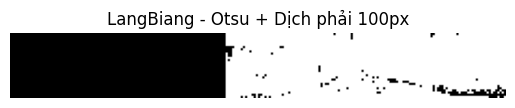

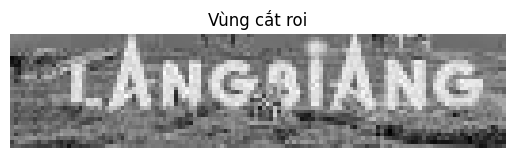

In [18]:
# Chuyển ảnh sang grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ------------ 1. Cắt vùng chữ "LangBiang" (tọa độ mẫu) ------------
# Bạn có thể chỉnh lại toạ độ này nếu ảnh khác
x, y, w, h = 80, 100, 130, 30  
roi = gray[y:y+h, x:x+w]

# ------------ 2. Tịnh tiến sang phải 100px ------------
M = np.float32([[1, 0, 100], [0, 1, 0]])
translated = cv2.warpAffine(roi, M, (w+100, h))

# ------------ 3. Áp dụng Otsu để phân ngưỡng ------------
# Otsu trả về ngưỡng tốt nhất tự động, ta không cần đặt thủ công
_, binary = cv2.threshold(translated, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ------------ 4. Lưu ảnh và hiển thị ------------
output_path = "lang_biang.jpg"
cv2.imwrite(output_path, binary)

# Hiển thị ảnh
plt.imshow(binary, cmap='gray')
plt.title("LangBiang - Otsu + Dịch phải 100px")
plt.axis('off')
plt.show()
plt.imshow(roi, cmap='gray')
plt.title("Vùng cắt roi")
plt.axis('off')
plt.show()
